In [5]:
import pandas as pd
import numpy as np
import os
import glob
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
os.chdir('C:\\Users\\pares\\Downloads\\ds_questions\\ds_questions\\massandopolis')
os.getcwd()

'C:\\Users\\pares\\Downloads\\ds_questions\\ds_questions\\massandopolis'

In [7]:
#what's my data?
all_files = glob.glob('*.csv')
all_files

['allergies.csv',
 'careplans.csv',
 'concepts.csv',
 'conditions.csv',
 'encounters.csv',
 'imaging_studies.csv',
 'immunizations.csv',
 'medications.csv',
 'observations.csv',
 'organizations.csv',
 'patients.csv',
 'patients_updated.csv',
 'procedures.csv',
 'providers.csv']

In [8]:
#loading patients updated file as patients
patients = pd.read_csv('patients_updated.csv')
patients.birthdate = patients.birthdate.apply(pd.to_datetime)
patients.deathdate = patients.deathdate.apply(pd.to_datetime)
patients.head(2)

,id,birthdate,deathdate,ssn,drivers,passport,prefix,first,last,suffix,...,address,city,state,zip,eventtime,status,trt,birth_year,death_year,age
0,c0d528b6-cdae-4d98-8936-a270f8827eb7,2013-02-10,NaT,999-83-3170,NaN,NaN,NaN,Claudette391,Hahn503,NaN,...,239 Schaden Glen,Randolph,Massandopolis,2368.0,2.770027,1,0,2013,2050.0,7.0
1,d709f84f-7d2c-440b-a979-2bc27d41f63a,1994-01-10,2019-01-07,999-31-7937,S99989196,X43239863X,Ms.,Christina143,Langworth352,NaN,...,535 Romaguera Annex Unit 82,Boston,Massandopolis,2108.0,2.973888,1,0,1994,2019.0,25.0


Now we know, since 1980s, Massandapolis is experiencing a lot of deaths, and that has resulted in population size declining (from 2000-2020). Next, lets understand why is this decrease happening or why are we experiencing so many deaths.

In [9]:
#Patients who have died
dead = patients.loc[(patients.death_year >= 1980) & (patients.death_year < 2020),['id','birth_year','death_year','age','deathdate']]
dead.head()

,id,birth_year,death_year,age,deathdate
1,d709f84f-7d2c-440b-a979-2bc27d41f63a,1994,2019.0,25.0,2019-01-07
7,96034260-617a-4818-a01b-57b37ddf5327,1950,2008.0,58.0,2008-09-04
17,2f83d4da-80ca-4ed3-823c-b8893d605429,1953,2019.0,66.0,2019-04-09
21,b0ea9896-75c2-4070-b771-512a765c9c2f,1966,1997.0,31.0,1997-04-18
23,a66bda4b-652d-4b76-b6fd-8aea3b26ad8a,1939,2006.0,67.0,2006-10-18


In [10]:
len(dead)

2825

We have 2825 people who died between 1980 and 2020. Lets understand their cause of deaths. Were there any condition/illness that caused it, or was it old age.

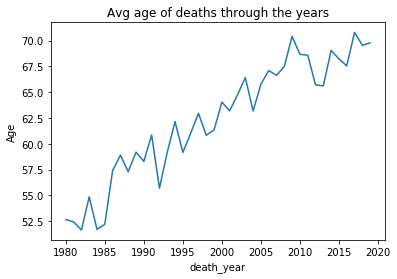

In [11]:
sns.lineplot(dead.groupby('death_year')['age'].mean().index,dead.groupby('death_year')['age'].mean().values,markers = True)
plt.title("Avg age of deaths through the years")
plt.ylabel('Age')
plt.show()

Average age or lifetime for people has gone better between 1980 and 2020, which shows access to healthcare and effects of healthcare. Lets go into a bit more detail about these (now dead) patients.

In [12]:
#lets get the conditions table
conditions = pd.read_csv('conditions.csv')
conditions.columns = [i.lower() for i in conditions.columns]
conditions.start = conditions.start.apply([pd.to_datetime])
conditions.stop = conditions.stop.apply([pd.to_datetime])
conditions.info()
conditions.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109720 entries, 0 to 109719
Data columns (total 6 columns):
start          109720 non-null datetime64[ns]
stop           61704 non-null datetime64[ns]
patient        109720 non-null object
encounter      109720 non-null object
code           109720 non-null int64
description    109720 non-null object
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 5.0+ MB


,start,stop,patient,encounter,code,description
0,2013-12-07,2013-12-07,c0d528b6-cdae-4d98-8936-a270f8827eb7,06429fa8-52a8-4e07-bd6a-b102b136cfa6,241929008,Acute allergic reaction
1,2014-12-03,2014-12-17,c0d528b6-cdae-4d98-8936-a270f8827eb7,2a24757d-039d-41d3-9570-4fe170c8a282,10509002,Acute bronchitis (disorder)
2,2015-02-17,NaT,c0d528b6-cdae-4d98-8936-a270f8827eb7,12b7aa28-f443-4ab1-87aa-0509a4e8a1bf,232353008,Perennial allergic rhinitis with seasonal vari...
3,2015-02-17,NaT,c0d528b6-cdae-4d98-8936-a270f8827eb7,6a95d43e-d1e5-4ab3-9a92-82f287b64f5d,233678006,Childhood asthma
4,2016-02-11,2016-02-18,c0d528b6-cdae-4d98-8936-a270f8827eb7,e19abba9-95fd-4071-ad5f-7efec4123b99,10509002,Acute bronchitis (disorder)


In [13]:
#About 152 diseases/illnesses. Lets combine these into more general causes
all_conditions = sorted(list(set(conditions.description.to_list())))
cond_cat = ['Urinary Tract Infection','Others','Upper Respiratory Tract','Lower Respiratory Tract','Lower Respiratory Tract',
            'Upper Respiratory Tract','Addiction','Brain Damage','Chronic Pain','Pregnancy','Digestive Tract','Lower Respiratory Tract',
           'Wounds and Injuries','Cardiovascular diseases','Mental Health','Urinary Tract Infection','Pregnancy','Lifestyle Diseases',
           'Lifestyle Diseases','Lifestyle Diseases','Brain Damage','Wounds and Injuries','Wounds and Injuries','Urinary Tract Infection',
           'Cardiovascular diseases','Others','Lower Respiratory Tract','Urinary Tract Infection','Cardiovascular diseases','Chronic Pain',
            'Urinary Tract Infection','Urinary Tract Infection','Urinary Tract Infection','Urinary Tract Infection','Lower Respiratory Tract',
            'Chronic Pain','Wounds and Injuries','Upper Respiratory Tract','Wounds and Injuries','Brain Damage','Brain Damage',
            'Brain Damage','Wounds and Injuries','Cardiovascular diseases','Hereditary Diseases','Urinary Tract Infection',
            'Lifestyle Diseases','Lifestyle Diseases','Lifestyle Diseases','Lifestyle Diseases','Addiction','Brain Damage',
            'Urinary Tract Infection','Wounds and Injuries','Brain Damage','Pregnancy','Pregnancy','Wounds and Injuries',
            'Wounds and Injuries','Wounds and Injuries','Wounds and Injuries','Wounds and Injuries','Wounds and Injuries',
            'Wounds and Injuries','Wounds and Injuries','Arthritis','Others','Digestive Tract','Cardiovascular diseases',
            'Others','Cardiovascular diseases','Brain Damage','Lifestyle Diseases','Lifestyle Diseases','Lifestyle Diseases',
            'Lifestyle Diseases','Others','Dental','Urinary Tract Infection','Upper Respiratory Tract','Wounds and Injuries',
            'Wounds and Injuries','Wounds and Injuries','Wounds and Injuries','Wounds and Injuries','Wounds and Injuries',
            'Wounds and Injuries','Arthritis','Hereditary Diseases','Lifestyle Diseases','Mental Health','Mental Health',
            'Pregnancy','Digestive Tract','Hereditary Diseases','Lifestyle Diseases','Urinary Tract Infection','Lifestyle Diseases',
            'Pregnancy','Cardiovascular diseases','Urinary Tract Infection','Lifestyle Diseases','Lower Respiratory Tract',
            'Lower Respiratory Tract','Lifestyle Diseases','Pregnancy','Addiction','Arthritis','Arthritis','Arthritis',
            'Upper Respiratory Tract','Digestive Tract','Arthritis','Upper Respiratory Tract','Upper Respiratory Tract',
            'Lower Respiratory Tract','Digestive Tract','Mental Health','Lifestyle Diseases','Pregnancy','Chronic Pain',
            'Digestive Tract','Lower Respiratory Tract','Lifestyle Diseases','Lifestyle Diseases','Digestive Tract',
            'Lower Respiratory Tract','Urinary Tract Infection','Urinary Tract Infection','Urinary Tract Infection','Arthritis',
            'Digestive Tract','Wounds and Injuries','Upper Respiratory Tract','Wounds and Injuries','Digestive Tract',
            'Brain Damage','Urinary Tract Infection','Upper Respiratory Tract','Lower Respiratory Tract','Lower Respiratory Tract',
            'Wounds and Injuries','Wounds and Injuries','Lower Respiratory Tract','Cardiovascular diseases','Lower Respiratory Tract',
            'Wounds and Injuries','Wounds and Injuries','Brain Damage','Pregnancy','Upper Respiratory Tract','Wounds and Injuries']
condition_categorized = {x:y for x,y in list(zip(all_conditions,cond_cat))}

In [14]:
conditions['condition_category'] = conditions.description.map(condition_categorized)

In [15]:
def number_of_conditions(patient_id):
    return conditions.loc[conditions.patient == patient_id,'condition_category'].nunique()
dead['num_of_conditions'] = dead.id.apply(number_of_conditions)
dead.head()

,id,birth_year,death_year,age,deathdate,num_of_conditions
1,d709f84f-7d2c-440b-a979-2bc27d41f63a,1994,2019.0,25.0,2019-01-07,6
7,96034260-617a-4818-a01b-57b37ddf5327,1950,2008.0,58.0,2008-09-04,7
17,2f83d4da-80ca-4ed3-823c-b8893d605429,1953,2019.0,66.0,2019-04-09,6
21,b0ea9896-75c2-4070-b771-512a765c9c2f,1966,1997.0,31.0,1997-04-18,7
23,a66bda4b-652d-4b76-b6fd-8aea3b26ad8a,1939,2006.0,67.0,2006-10-18,7


In [16]:
dead.num_of_conditions.describe()

count    2825.000000
mean        6.990442
std         1.882597
min         0.000000
25%         6.000000
50%         7.000000
75%         8.000000
max        13.000000
Name: num_of_conditions, dtype: float64

In [17]:
dead.loc[dead.age < 30,'num_of_conditions'].describe()

count    229.000000
mean       4.231441
std        1.892661
min        0.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        9.000000
Name: num_of_conditions, dtype: float64

People below 30 years suffering from more than 3-4 conditions on an average doesnt indicate towards a healthy population.

In [18]:
#Lets try to determine the cause of deaths from each patient -  by comparing their condition stopdates and deathdates
df = pd.merge(conditions[['patient','stop','condition_category']],patients[['id','deathdate']],how = 'left',left_on = 'patient',right_on = 'id')
df = df.loc[df.patient.isin(dead.id)]
#df.loc[df.stop.isnull(),'stop'] = df.loc[df.stop.isnull(),'deathdate']
df.stop = df.stop.apply(pd.to_datetime)
df.head()

,patient,stop,condition_category,id,deathdate
15,d709f84f-7d2c-440b-a979-2bc27d41f63a,2011-11-14,Wounds and Injuries,d709f84f-7d2c-440b-a979-2bc27d41f63a,2019-01-07
18,d709f84f-7d2c-440b-a979-2bc27d41f63a,2013-01-14,Upper Respiratory Tract,d709f84f-7d2c-440b-a979-2bc27d41f63a,2019-01-07
19,d709f84f-7d2c-440b-a979-2bc27d41f63a,1996-12-16,Upper Respiratory Tract,d709f84f-7d2c-440b-a979-2bc27d41f63a,2019-01-07
20,d709f84f-7d2c-440b-a979-2bc27d41f63a,1998-12-21,Upper Respiratory Tract,d709f84f-7d2c-440b-a979-2bc27d41f63a,2019-01-07
21,d709f84f-7d2c-440b-a979-2bc27d41f63a,1999-12-27,Upper Respiratory Tract,d709f84f-7d2c-440b-a979-2bc27d41f63a,2019-01-07


In [19]:
df.loc[(df.deathdate - df.stop).dt.days < 0].head()

,patient,stop,condition_category,id,deathdate
3886,65e207e3-ce9e-4682-9cc7-23f99f4b68f2,1986-03-10,Upper Respiratory Tract,65e207e3-ce9e-4682-9cc7-23f99f4b68f2,1985-11-10
11082,d187324d-94b5-4ead-8293-e94c5f6f198b,1997-02-04,Upper Respiratory Tract,d187324d-94b5-4ead-8293-e94c5f6f198b,1995-04-23
11083,d187324d-94b5-4ead-8293-e94c5f6f198b,1997-03-07,Lower Respiratory Tract,d187324d-94b5-4ead-8293-e94c5f6f198b,1995-04-23
13525,0f6d2679-0141-4827-82ac-aa5de2dd11d4,2014-06-18,Wounds and Injuries,0f6d2679-0141-4827-82ac-aa5de2dd11d4,2011-04-13
13526,0f6d2679-0141-4827-82ac-aa5de2dd11d4,2014-06-18,Arthritis,0f6d2679-0141-4827-82ac-aa5de2dd11d4,2011-04-13


What? Patients have stop-dates 2 years after they died. Looks like this data (condition stop-date) was put in by the hospitals once they found out patient was dead (Which may be long after they were dead!). This is not the actual stop-dates. 

That would mean each of the stop-dates are not the genuine stop-dates but only when the hospitals found out about it.

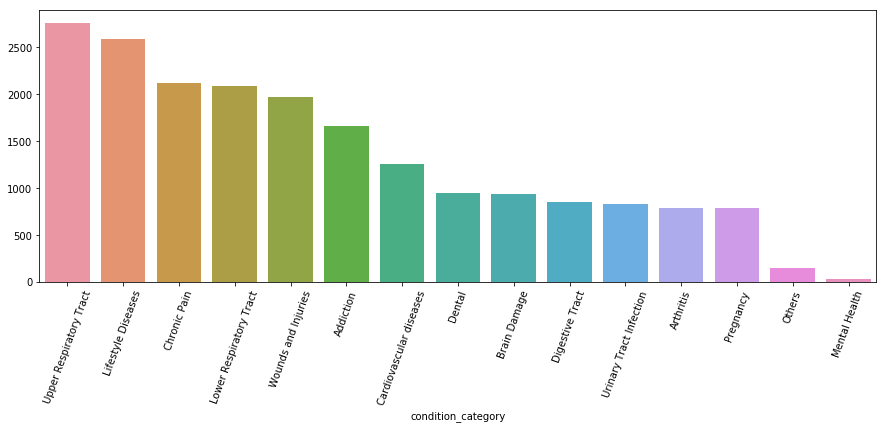

In [20]:
plt.figure(figsize = (15,5))
dead_cond = df.groupby('condition_category')['patient'].nunique().sort_values(ascending = False)
sns.barplot(dead_cond.index,dead_cond.values)
plt.xticks(rotation = 70)
plt.show()

Upper respiratory infections and lifestyle issues are the major conditions that the now dead suffered from. I want to know how these conditions progressed throughout the years. But before that, we need to understand a bit more about the conditions table - can we rely on this data?


In [21]:
conditions.head()

,start,stop,patient,encounter,code,description,condition_category
0,2013-12-07,2013-12-07,c0d528b6-cdae-4d98-8936-a270f8827eb7,06429fa8-52a8-4e07-bd6a-b102b136cfa6,241929008,Acute allergic reaction,Others
1,2014-12-03,2014-12-17,c0d528b6-cdae-4d98-8936-a270f8827eb7,2a24757d-039d-41d3-9570-4fe170c8a282,10509002,Acute bronchitis (disorder),Lower Respiratory Tract
2,2015-02-17,NaT,c0d528b6-cdae-4d98-8936-a270f8827eb7,12b7aa28-f443-4ab1-87aa-0509a4e8a1bf,232353008,Perennial allergic rhinitis with seasonal vari...,Upper Respiratory Tract
3,2015-02-17,NaT,c0d528b6-cdae-4d98-8936-a270f8827eb7,6a95d43e-d1e5-4ab3-9a92-82f287b64f5d,233678006,Childhood asthma,Lower Respiratory Tract
4,2016-02-11,2016-02-18,c0d528b6-cdae-4d98-8936-a270f8827eb7,e19abba9-95fd-4071-ad5f-7efec4123b99,10509002,Acute bronchitis (disorder),Lower Respiratory Tract


In [22]:
df = pd.merge(conditions[['patient','description','condition_category','start','stop']],patients[['id','birthdate','deathdate']],how = 'left',left_on = 'patient',right_on = 'id')
df.head()

,patient,description,condition_category,start,stop,id,birthdate,deathdate
0,c0d528b6-cdae-4d98-8936-a270f8827eb7,Acute allergic reaction,Others,2013-12-07,2013-12-07,c0d528b6-cdae-4d98-8936-a270f8827eb7,2013-02-10,NaT
1,c0d528b6-cdae-4d98-8936-a270f8827eb7,Acute bronchitis (disorder),Lower Respiratory Tract,2014-12-03,2014-12-17,c0d528b6-cdae-4d98-8936-a270f8827eb7,2013-02-10,NaT
2,c0d528b6-cdae-4d98-8936-a270f8827eb7,Perennial allergic rhinitis with seasonal vari...,Upper Respiratory Tract,2015-02-17,NaT,c0d528b6-cdae-4d98-8936-a270f8827eb7,2013-02-10,NaT
3,c0d528b6-cdae-4d98-8936-a270f8827eb7,Childhood asthma,Lower Respiratory Tract,2015-02-17,NaT,c0d528b6-cdae-4d98-8936-a270f8827eb7,2013-02-10,NaT
4,c0d528b6-cdae-4d98-8936-a270f8827eb7,Acute bronchitis (disorder),Lower Respiratory Tract,2016-02-11,2016-02-18,c0d528b6-cdae-4d98-8936-a270f8827eb7,2013-02-10,NaT


In [23]:
df.loc[df.start > df.deathdate,'patient'].nunique()

16

There are 16 such cases where patients have died and we have a condition reported for them years after their death

In [24]:
df.loc[df.start == df.stop,'condition_category'].value_counts()

Others                     156
Urinary Tract Infection     70
Chronic Pain                46
Mental Health                3
Name: condition_category, dtype: int64

Conditions with equal start and stop dates are for patients who experienced minor illnesses. This looks okay!

In [25]:
df.loc[df.start < df.birthdate]

,patient,description,condition_category,start,stop,id,birthdate,deathdate
14115,f274e59b-681e-45fa-89f5-7ef6bd291b4c,Alzheimer's disease (disorder),Brain Damage,1981-01-03,NaT,f274e59b-681e-45fa-89f5-7ef6bd291b4c,2003-11-12,1988-11-27
14116,f274e59b-681e-45fa-89f5-7ef6bd291b4c,Pneumonia,Lower Respiratory Tract,1988-11-22,NaT,f274e59b-681e-45fa-89f5-7ef6bd291b4c,2003-11-12,1988-11-27
59234,f9ab506d-beb4-49a7-9f84-569d9ac7544b,Seizure disorder,Brain Damage,1941-09-18,NaT,f9ab506d-beb4-49a7-9f84-569d9ac7544b,1971-08-08,NaT
59235,f9ab506d-beb4-49a7-9f84-569d9ac7544b,History of single seizure (situation),Brain Damage,1941-09-18,NaT,f9ab506d-beb4-49a7-9f84-569d9ac7544b,1971-08-08,NaT
59236,f9ab506d-beb4-49a7-9f84-569d9ac7544b,Epilepsy,Brain Damage,1941-09-18,NaT,f9ab506d-beb4-49a7-9f84-569d9ac7544b,1971-08-08,NaT
70866,82186679-c053-4d63-b66e-fc082c59ea03,Seizure disorder,Brain Damage,1956-04-07,NaT,82186679-c053-4d63-b66e-fc082c59ea03,1971-07-17,1957-02-02
70867,82186679-c053-4d63-b66e-fc082c59ea03,History of single seizure (situation),Brain Damage,1956-04-07,NaT,82186679-c053-4d63-b66e-fc082c59ea03,1971-07-17,1957-02-02


3 patients who have conditions reported before they were born! Oh, say hello to our negative age guys too! Looks like they mis-reported their birthdates!

We will remove these 19 (16 and 3) patients from further analysis, and assume that rest of the guys dont have any errors in the data

In [26]:
errors = df.loc[(df.start > df.deathdate) | (df.start < df.birthdate) ,'patient'].to_list()
#filtered data - excluded the patients with mis-reported data and restricted to patients who died between 1980 and 2020 
df = df.loc[df.patient.isin(errors) == False]
df = df.loc[((df.deathdate.dt.year > 1980) & (df.deathdate.dt.year < 2020)) | df.deathdate.isnull()]
df = df[['patient','condition_category','start','stop','birthdate','deathdate']].drop_duplicates().reset_index(drop = True)
df.head()

,patient,condition_category,start,stop,birthdate,deathdate
0,c0d528b6-cdae-4d98-8936-a270f8827eb7,Others,2013-12-07,2013-12-07,2013-02-10,NaT
1,c0d528b6-cdae-4d98-8936-a270f8827eb7,Lower Respiratory Tract,2014-12-03,2014-12-17,2013-02-10,NaT
2,c0d528b6-cdae-4d98-8936-a270f8827eb7,Upper Respiratory Tract,2015-02-17,NaT,2013-02-10,NaT
3,c0d528b6-cdae-4d98-8936-a270f8827eb7,Lower Respiratory Tract,2015-02-17,NaT,2013-02-10,NaT
4,c0d528b6-cdae-4d98-8936-a270f8827eb7,Lower Respiratory Tract,2016-02-11,2016-02-18,2013-02-10,NaT


In [27]:
def mapping_conditions(data):
    all_years = [i for i in range(1980,2020)]
    condition_count = pd.DataFrame(columns = ['year'] + list(conditions.condition_category.value_counts().index))
    
    for year in all_years:
        temp = data.loc[(data.birthdate.dt.year < year) & ((data.deathdate.dt.year > year)|data.deathdate.dt.year.isnull()) & (data.start.dt.year <= year) & ((data.stop.dt.year >= year) | data.stop.dt.year.isnull()),'condition_category'].value_counts()
        condition_count = condition_count.append(temp,ignore_index = True)
    
    condition_count.year = all_years
    condition_count.set_index('year',inplace = True)


    return condition_count

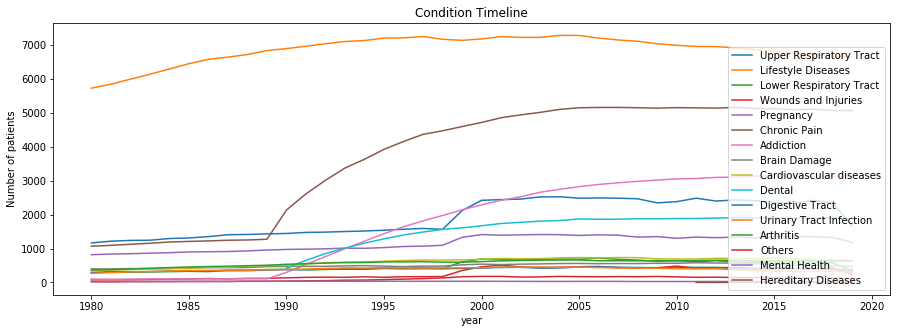

In [28]:
illness_map_all = mapping_conditions(df)
plt.figure(figsize = (15,5))
for col in illness_map_all.columns:
    sns.lineplot(x = illness_map_all.index,y = illness_map_all[col],label = col)
plt.legend(loc = 'lower right')
plt.title('Condition Timeline')
plt.ylabel('Number of patients')
plt.show()    

We can see almost all diseases/conditions kept on increasing. Few of them saw a phenominal rise. This doesn't show health of Massandopolis people in good light. Having 3-4 conditions on average and the continuous increase in the number of patients suffering from different diseases is not good at all.

In [29]:
df2 = df.loc[df.patient.isin(dead.id.to_list())]
illness_map_dead = mapping_conditions(df2)

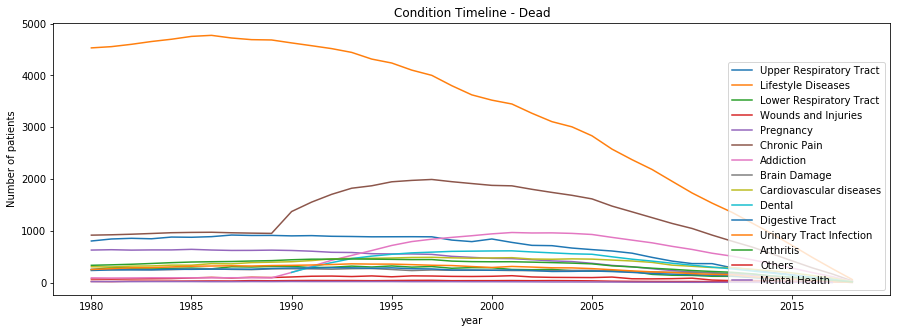

In [30]:
plt.figure(figsize = (15,5))
for col in illness_map_dead.columns:
    sns.lineplot(x = illness_map_dead.index,y = illness_map_dead[col],label = col)
plt.legend(loc = 'lower right')
plt.title('Condition Timeline - Dead')
plt.ylabel('Number of patients')
plt.show()    

This one is really insightful. 3 conditions stand out here.
1. Chronic Pain
2. Addiction
3. Dental

All the above conditions saw quite a rise in the 1990s. There was quite a bump in the number of people (who are now dead) suffering from the above conditions. And there is quite a correlation between the 3. People suffering from chronic pain often end up being addicted to some kind of drugs and that impacts their dental hygiene as well.

#### To sum it up, we saw quite a rise in addiction related issues in the 1990s when we also saw a linear increase in the number of deaths. It makes sense to think that this relationship is a causal one, and drug abuse claimed a lot of lives in the state.

Now, lets focus on how fit/ equipped the population was to fight diseases. I want to understand the health of the population. Were they healthy? Were they vaccinated? What medicines were available to the population?
